#**NHÓM 7**
| STT |Họ và tên            | Description |Role|
| ----| --------------------|------------ |----|
| 1   | Nguyễn Quốc Cường   | 1852|Leader|
| 2   | Nguyễn Trung Hiếu   | 1852|Member|
| 3   | Võ Linh Bảo         | 18520503|Member|

Vùng đất diệu kỳ Wonderland có N hộ gia đình đã được trang bị một hệ thống cung cấp nước sạch đến từng ngôi nhà. Mỗi đường ống nối trực tiếp 2 nhà, nước chảy trong đường ống theo 2 chiều, có thể truyền qua nhiều trung gian trước khi đến một nhà nào đó. Trong hồ sơ lưu trữ, các ngôi nhà được ghi số từ 1 đến N.

Một trận động đất đã gây nên sự cố nghiêm trọng làm cho cả vùng bị chia cắt thành nhiều khu vực rời nhau, không còn tiếp cận được với nguồn nước. Để khắc phục, những người có trách nhiệm đã khảo sát hiện trạng và ghi nhận được toàn vùng đất đang thảm họa vẫn còn M đường ống đang hoạt động tốt.

Nhiệm vụ đặt ra là phải khôi phục hệ thống cấp nước bằng cách lắp thêm một số đường ống. Tuy nhiên, do hạn chế về thời gian và kinh phí nên đòi hỏi phương án khôi phục phải được thực hiện với ít đường ống được lắp thêm nhất. Câu hỏi đặt ra: cần lắp thêm ít nhất bao nhiêu đường ống để hệ thống cấp nước có thể đưa nước đến từng ngôi nhà. Câu hỏi phụ: có bao nhiêu phương án khác nhau đáp ứng yêu cầu; số phương án có thể khá lớn nên chỉ cần đưa ra số dư khi chia cho $10^9+7$.

Dữ liệu: Vào từ thiết bị nhập chuẩn:

Dòng đầu tiên chứa 2 số nguyên $N, M$ ($1 ≤ N, M  ≤ 10^5$)

Mỗi dòng trong M dòng tiếp theo chứa 2 số nguyên a, b ($1 ≤ a,  b ≤ N$). cho biết vẫn còn đường ống nối nhà a với nhà b

Kết quả: Đưa ra thiết bị xuất chuẩn số đường ống cần được lắp thêm và số phương án đáp ứng yêu cầu (theo mô đun $10^9+7$) mỗi số trên một dòng.

Dữ liệu mẫu:  

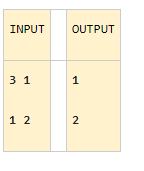

#Abstraction
Cho 1 đồ thị vô hướng gồm n đỉnh 
 - Tìm số cạnh ít nhất cần thêm vào để đồ thị trở thành liên thông
 - Tìm số cách thêm cạnh với modun $10^9+7$

# Pattern recognition
- Bài toán yêu cầu đếm số cạnh cần thêm để đồ thị liên thông $\rightarrow$ dạng bài toán tìm các thành phần liên thông trong đồ thị
- Đếm số cách thêm cạnh $\rightarrow$ dạng bài toán số học, cụ thể là dạng phương pháp đếm

# Algorithm Design 
Giả sử đồ thị bao gồm k thành phần liên thông. Số lượng đỉnh của từng thành phần liên thông lần lượt là $b_1,b_2,...,b_k$
## Số cạnh cần thiết cần thêm vào để đồ thị liên thông
Ta xem mỗi thành phần liên thông là 1 đỉnh thuộc 1 đồ thị mới. Khi đó số cạnh cần thêm vào chính là số cạnh của 1 cây khung. Với đồ thị mới gồm n đỉnh thì đáp án là k-1
## Số cách thêm cạnh
Đây là 1 công thức ứng dụng của của Prüfer code.  
Công thức để tính số cách thêm cạnh là $n^{k-1}*b_1*b_2*...*b_k$

#Pseudo code
```
input -> n,m
input -> edges of the graph

Use BFS or DFS to find the adjacent components
output <- number of component - 1
output <- $n^{k-1}*b_1*b_2*...*b_k$
```

#Execution


In [ ]:
n,m = map(int,input().split(" "))
adj = {}
visited = {}
mod = int(10**9 + 7)

for i in range(m):
	a, b= map(int, input().split(" "))
	if a < 1 or a > n or b < 1 or b > n:
		continue
	if a in adj:
		adj[a].append(b)
	else:
		adj[a] = [b]
	
	if b in adj:
		adj[b].append(a)
	else:
		adj[b] = [a]

comp = []
#print(adj)

for i in range(1,n+1):
	if not i in visited:
		ls = [i]
		visited[i] = True
		ind = 0
		while ind < len(ls):
			if not ls[ind] in adj:
				ind += 1
				continue
			for e in adj[ls[ind]]:
				if not e in visited:
					visited[e] = True
					ls.append(e)
			ind += 1
		comp.append(len(ls))

#print(comp)

ans = 0
if len(comp)>1:
	ans = (n**(len(comp)-2)) % mod
	for x in comp:
		ans = (ans * x) % mod

print(len(comp)-1)
print(int(ans)) 

3 1
1 2
1
2
